## Problem 84: Monopoly odds

In [265]:
using Random

function roll(n = 6)
    double = false
    r1 = rand(1:n)
    r2 = rand(1:n)
    if r1 == r2
        double = true
    end
    return r1 + r2, double
end

function initstacks()
    ccstack = shuffle!(vcat([0, 10], ones(Int, 14)*(-1)))
    chstack = shuffle!(vcat([0, 10, 11, 24, 39, 5, 50, 50, 60, 70], ones(Int, 6)*(-1)))
    return ccstack, chstack
end

function go(pos, rolls, ccstack, chstack)
    steps, double = roll(4)
    if rolls[1] & rolls[2] & double
        newpos = 10
        rolls = [false, false]
    else
        rolls[1] = rolls[2]
        rolls[2] = double
        newpos = pos[end] + steps
        if newpos > 39
            newpos -= 40
        end
        if newpos == 30
            newpos = 10
        elseif newpos in [2, 17, 33]
            cc = ccstack[1]
            ccstack = circshift(ccstack, -1)
            if cc >= 0
                newpos = cc
            end
        elseif newpos in [7, 22, 36]
            ch = chstack[1]
            chstack = circshift(chstack, -1)
            if ch >= 0
                if ch == 50
                    if newpos == 7
                        newpos = 15
                    elseif newpos == 22
                        newpos = 25
                    elseif newpos == 36
                        newpos = 5
                    end
                elseif ch == 60
                    if newpos in [7, 36]
                        newpos = 12
                    elseif newpos == 22
                        newpos = 28
                    end
                elseif ch == 70
                    if newpos == 36
                        cc = ccstack[1]
                        ccstack = circshift(ccstack, -1)
                        if cc >= 0
                            newpos == cc
                        end
                    else
                        newpos -= 3
                    end
                else
                    newpos = ch
                end
            end
        end
    end
    push!(pos, newpos)
    return ccstack, chstack
end                     

go (generic function with 2 methods)

In [266]:
nvals = [1000000]
jail = []
e3 = []
top = Dict()
first = []
for n = nvals
    ccstack, chstack = initstacks()
    pos = [0]
    rolls = [false, false]
    for i = 1:n
        ccstack, chstack = go(pos, rolls, ccstack, chstack)
    end
    squares = unique(pos)
    counts = Dict([(i, count(x->x==i, pos)) for i in squares])
    push!(jail, counts[10]/n)
    push!(e3, counts[24]/n)
    push!(first, counts[0]/n)
    scounts = sort(collect(counts), by = x->x[2])
    top[n] = scounts[end:-1:end-4]
end

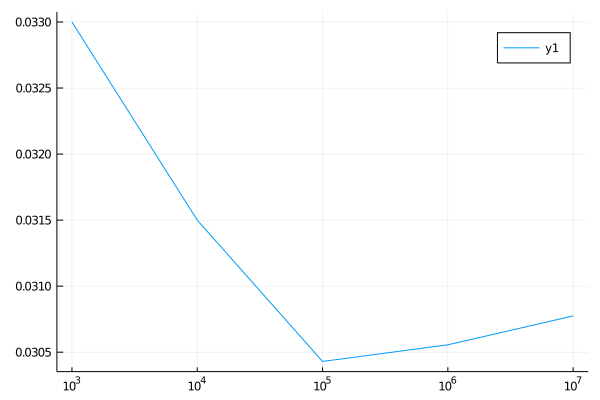

In [251]:
plot(nvals, jail, xaxis=:log)
plot(nvals, e3, xaxis=:log)
plot(nvals, first, xaxis=:log)

In [254]:
jail

1-element Array{Any,1}:
 0.06305219

In [255]:
e3

1-element Array{Any,1}:
 0.03180562

In [256]:
first

1-element Array{Any,1}:
 0.03075102